<h1 align = "center">PREDICTION USING SUPERVISED LEARNING</h1

<h2 align = "center">SPARKS FOUNDATION GRADUATE RESEARCH INTERNSHIP PROGRAM</h2>
<h2 align = "center">DATA SCIENCE & BUSINESS ANALYST TASK-1

## IMPORTING MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## DATA LOADING

In [3]:
## Data .csv is in the file.
data = pd.read_csv("New Microsoft Excel Worksheet.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.info()
### So our data is clean we don't need to scrap it more we can directly give it to the model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## PLOTTING THE DISTRIBUTION OF SCORES

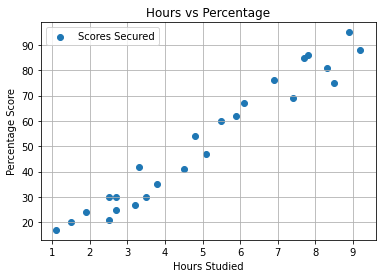

In [11]:
plt.scatter(data['Hours'],data['Scores'],label='Scores Secured')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.legend()
plt.show()

## PREPARING THE DATA

In [12]:
x = data[["Hours"]]
y = data["Scores"]

## SPLITING THE DATA

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.9,random_state = 0)

## TRAINING THE MODEL

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print(pd.DataFrame(y_pred_test)) ###Predicted Scores for test hours

           0
0  17.302210
1  34.055294
2  75.445267


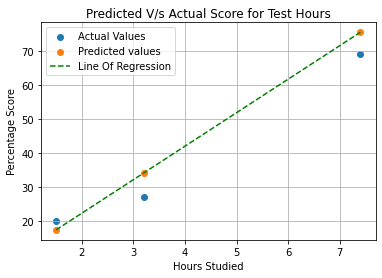

In [29]:
##Predicted V/s Actual Score for Test Hours

plt.scatter(x_test,y_test,label = 'Actual Values')
plt.scatter(x_test,y_pred_test,label= 'Predicted values')
plt.plot(x_test,y_pred_test,'--g',label='Line Of Regression')

plt.title('Predicted V/s Actual Score for Test Hours')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

plt.legend()
plt.grid()
plt.show()

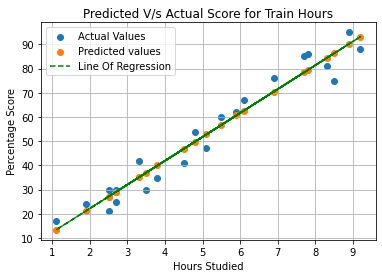

In [30]:
##Predicted V/s Actual Score for Test Hours

plt.scatter(x_train,y_train,label = 'Actual Values')
plt.scatter(x_train,y_pred_train,label= 'Predicted values')
plt.plot(x_train,y_pred_train,'--g',label='Line Of Regression')

plt.title('Predicted V/s Actual Score for Train Hours')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

plt.legend()
plt.grid()
plt.show()


In [31]:
accuracy = model.score(x_test,y_test)
print("The accuracy of the model is:",round(accuracy*100,3),"%")

The accuracy of the model is: 92.981 %


### OPTIMIZING THE ACCURACY

In [32]:
accuracy_list = []
for i in range(10000):
    xtrain_new,xtest_new,ytrain_new,ytest_new = train_test_split(x,y,train_size=0.9,random_state=i)
    model1 = LinearRegression()
    model1.fit(xtrain_new,ytrain_new)
    new_accuracy = model1.score(xtest_new,ytest_new)
    accuracy_list.append(new_accuracy)
        

accuracy_list    

[0.9298077534821834,
 0.604105492896367,
 -1.4225903447212924,
 0.9327813663954249,
 0.8405585799004379,
 0.9025194047306003,
 0.9459052529599732,
 0.9544952944382422,
 0.9381449038927532,
 -0.5330400581613686,
 0.7553317386299324,
 0.4675045961759784,
 -0.6367753292949787,
 0.8999033015656035,
 0.8453088467919847,
 -1.6350288730151186,
 0.7400383032083478,
 0.9454439254005509,
 0.9729956983026027,
 -0.15648081324476126,
 0.8493620117021918,
 0.6847148833734544,
 0.6901200182361096,
 0.9801342719762446,
 0.9702820274629472,
 -16.011152727976768,
 0.9514975041111624,
 0.9400898178018178,
 0.9514983640998469,
 0.9368443486474068,
 0.938875663630763,
 0.9689202135778107,
 0.3228704113881189,
 0.9528473689506218,
 0.9528473689506219,
 0.8976193140151002,
 -0.2555184107568049,
 0.9764246161290429,
 0.9216866523682256,
 0.9559818106352874,
 0.9609220899987835,
 0.9497259731613221,
 0.974047128713709,
 0.9713875893742198,
 0.9068477270479202,
 0.08015258045624785,
 0.8369747552485851,
 0.9668

In [153]:
np.max(accuracy_list)

0.9902495698647099

In [33]:
np.argmax(accuracy_list)
print("The optimized accuracy will be opted at random seed:",np.argmax(accuracy_list))

The optimized accuracy will be opted at random seed: 6164


So our optimized accuracy is 0.9902495698647099

In [34]:
xtrain_new,xtest_new,ytrain_new,ytest_new = train_test_split(x,y,train_size=0.9,random_state=6164)
model_final = LinearRegression()
model_final.fit(xtrain_new,ytrain_new)
final_accuracy = model_final.score(xtest_new,ytest_new)
print("The accuracy of the model is:",round(final_accuracy*100,3),"%")

The accuracy of the model is: 99.025 %


## SAVING & LOADING THE MODEL

In [35]:
import joblib
joblib.dump(model_final,'Marks_Predictior.pkl')

['Marks_Predictior.pkl']

In [36]:
my_model = joblib.load('Marks_Predictior.pkl')

In [39]:
## For 9.25 hours of study the marks obtained wil be
predicted_marks = my_model.predict([[9.25]])[0]
print("Hence for 9.25 hours of study marks obtained will be:",predicted_marks)

Hence for 9.25 hours of study marks obtained will be: 93.19838345060057


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
